<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Descriptive Statistics</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a id=contentpage></a>
### Objectives
After completing this practical exercise, you should be able to:
- [1: Visualize Categorical Variables using:](#a)
    - [1.1 Frequency table](#a1)
    - [1.2 Bar Chart](#a2)
    - [1.3 Pie Chart](#a3)
- [2: Visualize Numerical Variables using:](#b)
    - [2.1 Grouped frequency table](#b1)
    - [2.2 Histogram](#b2)
    - [2.3 Box and whiskers diagram](#b3)
    - [2.4 Violin plot](#b4)
- [3: Visualize Relationships between Variables using:](#c)
    - [3.1 Cross tabulation](#c1)
    - [3.2 Bar plots](#c2)
    - [3.3 Scatter plots](#c3)
    - [3.4 Line graph](#c4)


<a id="a"></a>
##  1 Visualize Categorical Variables

<a id="a1"></a>
### 1.1 Frequency Table

In [1]:
# read in the csv
import pandas as pd
data = pd.read_csv("./data/data.csv")
data.head()

,Branch,Room Type,Comfort,Value,Length of Stay (days)
0,South Side,Single,3,5,9
1,South Side,Deluxe,4,6,5
2,North West,Twin,5,7,4
3,Central,Deluxe,5,9,3
4,North West,Suite,6,7,2


In [2]:
# frequency table
data['Branch'].value_counts()

North West    8
South Side    5
Central       5
Name: Branch, dtype: int64

#### Qn 1: How many of each room types does this hotel chain have?

In [3]:
# Answer:
cat_data = data['Room Type'].value_counts()

# alternative methods
data.iloc[:,0].value_counts()
data.loc[:,'Room Type'].value_counts()

Deluxe    7
Single    4
Suite     4
Twin      3
Name: Room Type, dtype: int64

<a id="a2"></a>
### 1.2 Bar Chart

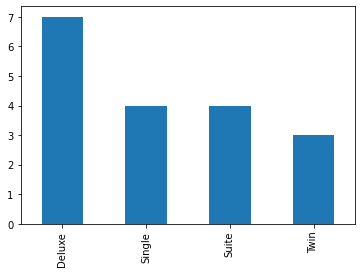

In [4]:
import matplotlib.pyplot as plt
# bar chart
cat_data.plot(kind='bar')
plt.show()

# horizontal
#cat_data.plot(kind='barh')
#plt.show()

#### Qn 2: Display a horizontal bar chart for the hotel Branch

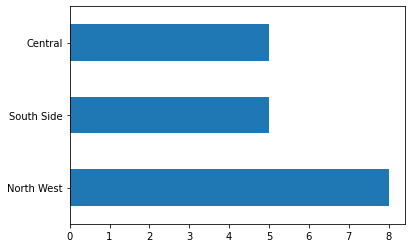

In [5]:
# Answer: 
data['Branch'].value_counts().plot(kind = 'barh')
plt.show()

<a id="a3"></a>
### 1.3 Pie Chart

<AxesSubplot:ylabel='Branch'>

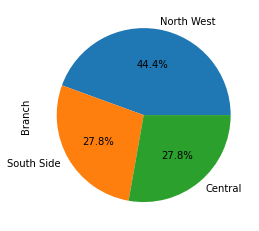

In [6]:
# pie chart shows you the proportion of each categorical variable
data['Branch'].value_counts().plot(kind='pie', autopct='%1.1f%%')

[Back to top](#contentpage)

## <a id="b"></a>
##  2 Visualize Numerical Variables

<a id="b1"></a>
### 2.1 Grouped Frequency Distribution Table

In [7]:
# min(data['Length of Stay (days)'])
# max(data['Length of Stay (days)'])

In [8]:
# Create bins
bins = [0,3,6,9,12]
lab = ['1-3','4-6','7-9','10-12']
data['Stay range'] = pd.cut(data['Length of Stay (days)'],bins,labels = lab)

In [9]:
data.head()

,Branch,Room Type,Comfort,Value,Length of Stay (days),Stay range
0,South Side,Single,3,5,9,7-9
1,South Side,Deluxe,4,6,5,4-6
2,North West,Twin,5,7,4,4-6
3,Central,Deluxe,5,9,3,1-3
4,North West,Suite,6,7,2,1-3


In [10]:
tab = pd.crosstab(index = data['Stay range'], columns = 'Frequency')
tab

col_0,Frequency
Stay range,
1-3,7
4-6,6
7-9,4
10-12,1


<a id="b2"></a>
### 2.2 Histogram

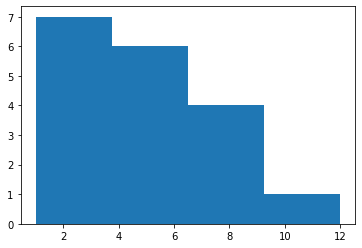

In [11]:
plt.hist(data['Length of Stay (days)'], bins = 4)
# the way the interval is calculated is (largest - smallest number)/ no. of bins
plt.show()

<a id="b3"></a>
### 2.3 Box and whiskers Diagram

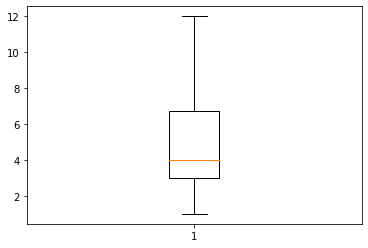

In [12]:
# plot boxplot. To adjust the whiskers, use whis = [lower quantile, upper quantile]
plt.boxplot(data['Length of Stay (days)'])
#plt.boxplot(data['Length of Stay (days)'], whis = [10,90])
 
# show plot
plt.show()

<a id="b4"></a>
### 2.4 Violin plot
Violin plots are similar to box plots, except that they also show the probability density of the data at different values. Like box plots, violin plots are used to represent comparison of a variable distribution (or sample distribution) across different "categories".

A violin plot is more informative than a plain box plot. In fact while a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.

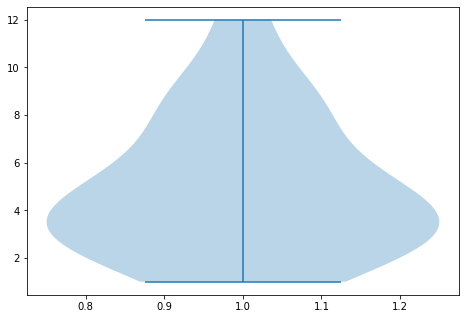

In [13]:
# violin plot can be used to represent numerical data as well.
# The width of this plot is the largest around 4,and narrowest at 12 days of stay.

# Create a figure instance
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(data['Length of Stay (days)'])
plt.show()

[Back to top](#contentpage)

## <a id="c"></a>
##  3 Visualize Relationships between Variables

<a id="c1"></a>
### 3.1 Two categorical variables - Cross tabulation

In [14]:
# Creating crosstab
crosstb = pd.crosstab(data['Branch'], data['Room Type'])
crosstb

Room Type,Deluxe,Single,Suite,Twin
Branch,,,,
Central,3,1,0,1
North West,2,1,3,2
South Side,2,2,1,0


<a id="c2"></a>
### 3.2 Two categorical variables -  Bar plots

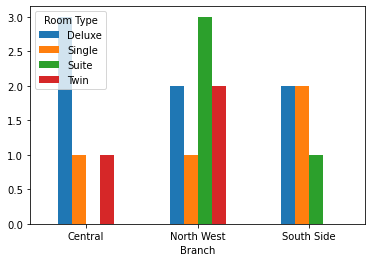

In [15]:
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

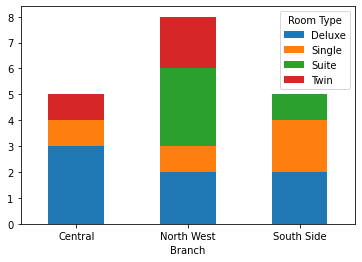

In [16]:
# Creating barplot (stacked)
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

<a id="c3"></a>
### 3.3 Two numerical variables - scatterplots

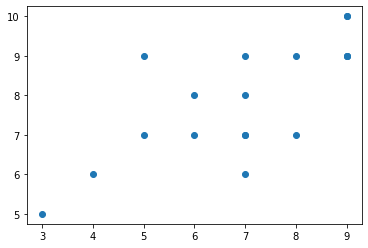

In [17]:
# Scatter plots
plt.scatter(data['Comfort'], data['Value'])
plt.show()

#### Qn 3: Is there any relationship observed for value and length of stay?

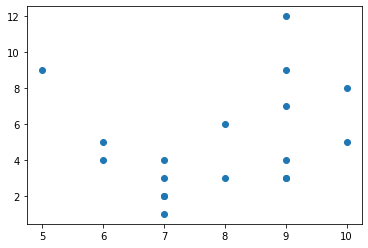

In [18]:
plt.scatter(data['Value'], data['Length of Stay (days)'])
plt.show()

<a id="c4"></a>
### 3.4 Numerical data over time - Line Chart

In [19]:
import pandas as pd
cpf = pd.read_csv("./data/yearly-amount-of-extra-interest-credited-to-cpf-members.csv")
# data taken from data.gov.sg

In [20]:
cpf.head()

,yr,interest_amt
0,2008,811000000
1,2009,877300000
2,2010,937500000
3,2011,1001200000
4,2012,1091000000


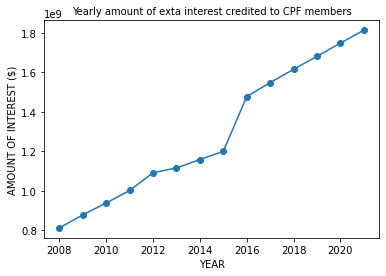

In [21]:
import matplotlib.pyplot as plt
plt.plot(cpf['yr'], cpf['interest_amt'], marker = 'o', linestyle='-')
plt.title("Yearly amount of exta interest credited to CPF members",  fontsize=10)
plt.ylabel("AMOUNT OF INTEREST ($)")
plt.xlabel("YEAR")
plt.show()

#### Q4: Is there any unusual trend detected in the line graph?
Interest is computed monthly, compounded and credited yearly.
The amount of interest refers to an extra 1% interest paid on the first \\$x amount of a member's balance. 

Ans: The sudden increase seen from 2015 to 2016 in the chart from ~1.2billion to ~1.5billion is observed.
The amount of interest refers to an extra 1% interest paid on the first \\$60,000 of a member's combined balances (implemented in 2008), and an additional 1% extra interest on the first \\$30,000 of their combined balances was implemented in 2016.
This explains the sudden increase seen from 2015 to 2016 in the chart.

[Back to top](#contentpage)